# Homework #3 (Gökçe Deliorman)

## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

# Part 1:

In [356]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [273]:
data= fetch_olivetti_faces()
data.data.shape

(400, 4096)

In [274]:
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

### x: independent variables

In [251]:
x = data.images
x.shape

(400, 64, 64)

In [68]:
y=data.target
y.shape

(400,)

### reshape x

In [350]:
datax = x.reshape(x.shape[0], x.shape[1] * x.shape[2])   
print(datax.shape)

df2 = pd.DataFrame(datax)
df2

(400, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


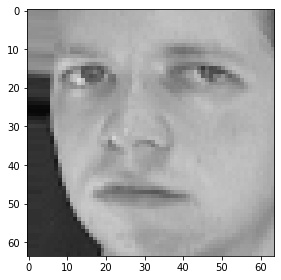

In [346]:
from skimage.io import imshow
image_fromdata = x[5]
imshow(image_fromdata)

### Each row is a face image corresponding to one of the 40 subjects of the dataset. So there are 40 classes in the dataset. Each test set should contain exactly one random image from each distinct individual. To achieve this, I used the stratify feature.

In [386]:
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, stratify=y)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(320, 4096) (80, 4096)
(320,) (80,)


In [367]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import svm
from sklearn import linear_model
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

### SVM 

In [399]:
sum=0
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, stratify=y)
    model = SVC()
    model.fit(x_train,y_train)
    print(model.score(x_test,y_test))
    sum=sum+model.score(x_test,y_test)

print('sum:', sum)  
print('mean is:', sum/10)

0.9625
0.9625
0.8875
0.9375
0.9375
0.9375
0.9
0.9625
0.95
0.9125
sum: 9.35
mean is: 0.9349999999999999


### Part 2: multinomial regression model

In [401]:
lm=linear_model.LogisticRegression()

lm.fit(x_train, y_train)

C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [402]:
fit= lm.fit(x_train, y_train)

C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [369]:
metrics.accuracy_score(y_test, lm.predict(x_test))

0.9625

In [370]:
lm.predict(x_test)

array([18, 23, 39,  6, 38, 28, 19, 22,  5, 24, 37,  7, 34, 32,  8, 31, 25,
       34, 27, 29, 24,  5,  2, 26, 11, 26, 11, 33,  5, 35, 35, 13, 39,  4,
        2, 10, 30, 36, 15, 17,  9, 29,  9,  1, 14,  7, 14,  1,  6,  3, 15,
       30,  0,  3, 27, 16, 20, 32,  0, 28, 21, 25, 19, 38, 22, 16, 33, 31,
       17, 23, 13, 10, 37, 20,  8,  5, 21, 36, 18,  0])

In [400]:
##10times

sum=0
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, stratify=y)
    lm=linear_model.LogisticRegression(multi_class='multinomial')
    lm.fit(x_train, y_train)
    metrics.accuracy_score(y_test, lm.predict(x_test))
    print(metrics.accuracy_score(y_test, lm.predict(x_test)))
    sum=sum+metrics.accuracy_score(y_test, lm.predict(x_test))

print('sum:', sum)  
print('mean is:', sum/10)

C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9625


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9625


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9375


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9625


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975
0.95
sum: 9.624999999999998
mean is: 0.9624999999999998


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 2 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 2.


### Question 2:

In [291]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import nltk
import string
from urllib.request import urlopen
from collections import Counter
from re import sub
import urllib.request
from nltk.tokenize import word_tokenize
from sklearn.datasets import load_files

### When I run the following command, text-train folders were created on my computer. 

In [ ]:
!tar -xf aclImdb_v1.tar.gz

### I couldn't delete the unsup folder using code, so I deleted it manually from the computer.

In [302]:
train_neg = load_files("C:\\Users\\gokcedeliorman\\Desktop\\aclImdb\\train\\neg")
train_pos=load_files("C:\\Users\\gokcedeliorman\\Desktop\\aclImdb\\train\\pos")

### I couldn't upload the dataset to github as it is too big.

In [327]:
train= load_files("C:\\Users\\gokcedeliorman\\Desktop\\aclImdb\\train\\")

In [406]:
text_train, Y_train = train.data, train.target

In [329]:
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
text_train[5]

type of text_train: <class 'list'>
length of text_train: 25000


b"The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.<br /><br />Stargate SG1 is currently one of my favorite programs."

In [330]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_train[5]

b"The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.  Stargate SG1 is currently one of my favorite programs."

In [407]:
test = load_files("C:\\Users\\gokcedeliorman\\Desktop\\aclImdb\\test\\")
text_test, Y_test = test.data, test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [323]:
vect = CountVectorizer()
vect.fit(text_train)

CountVectorizer()

In [324]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))

Vocabulary size: 74849


In [354]:
words = vect.transform(text_train)
print(format(repr(words)))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [202]:
import nltk
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    | 

[nltk_data]    |   Unzipping corpora\pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\pl196x.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\ppattach.zip.
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\problem_reports.zip.
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping corpora\ptb.zip.
[nltk_data]    | Download

[nltk_data]    |   Unzipping tokenizers\punkt.zip.
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping grammars\book_grammars.zip.
[nltk_data]    | Downloading package sample_grammars to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping grammars\sample_grammars.zip.
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping grammars\spanish_grammars.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData\Roaming\nltk_data
[nltk_data]    |     ...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Downloading package large_grammars to
[nltk_data]    |     C:\Users\gokcedeliorman\AppData

True

### Another way to get data:

In [403]:
np.random.seed(2017) # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [404]:
max_features = 20000
maxlen = 80 # cut texts after this number of words (among top max_featuresmost common words)
batch_size = 32
#(X_train, Y_train), (X_test, Y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


C:\Users\gokcedeliorman\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### LDA (I copied this part from lecture 7 but it doesnt work.:( )

In [409]:
model = LinearDiscriminantAnalysis()
model.fit(words, Y_train)
transformed = model.fit_transform(words, Y_train)
#plt.scatter(transformed[:,0],np.zeros(len(transformed)),c=y_train)


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.